<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Introduction to DS
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

## Problem statement

S·ª≠ d·ª•ng d·ªØ li·ªáu thu th·∫≠p ƒë∆∞·ª£c ƒë·ªÉ t·∫°o m·ªôt h·ªá th·ªëng ƒë·ªÅ xu·∫•t video th√¥ng qua m·ªôt ƒëo·∫°n vƒÉn m√† ng∆∞·ªùi d√πng nh·∫≠p v√†o c√¥ng c·ª• t√¨m ki·∫øm (gi·ªëng nh∆∞ ch√∫ng ta ƒëang b·∫Øt ch∆∞·ªõc h·ªá th·ªëng ƒë·ªÅ xu·∫•t c·ªßa youtube).

Gi·∫£i quy·∫øt b√†i to√°n n√†y s·∫Ω gi√∫p √≠ch cho c·∫£ ng∆∞·ªùi d√πng v√† n·ªÅn t·∫£ng ph√°t s√≥ng:
- ƒê√¥i khi ng∆∞·ªùi d√πng mu·ªën xem m·ªôt video n√†o ƒë√≥ nh∆∞ng h·ªç l·∫°i kh√¥ng bi·∫øt n√™n ch·ªçn c√°i n√†o trong v√¥ s·ªë video hi·ªán c√≥. Khi n√†y, h·ªá th·ªëng ƒë·ªÅ xu·∫•t c·ªßa ch√∫ng ta s·∫Ω g·ª£i √Ω nh·ªØng video m√† ng∆∞·ªùi d√πng c√≥ th·ªÉ mu·ªën xem nh·∫•t th√¥ng qua ƒëo·∫°n vƒÉn b·∫£n m√† ng∆∞·ªùi d√πng nh·∫≠p v√†o c√¥ng c·ª• t√¨m ki·∫øm. Khi n√†y, ng∆∞·ªùi d√πng s·∫Ω c√≥ ƒë∆∞·ª£c tr·∫£i nghi·ªám s·ª≠ d·ª•ng d·ªãch v·ª• t·ªët h∆°n, ƒë·ª° m·∫•t nhi·ªÅu c√¥ng s·ª©c, th·ªùi gian ƒë·ªÉ xem th·ª≠ t·ª´ng video kh√°c nhau, v.v.
- V·ªõi n·ªÅn t·∫£ng ph√°t s√≥ng, vi·ªác ƒë·ªÅ xu·∫•t ƒë∆∞·ª£c nh·ªØng video m√† ng∆∞·ªùi d√πng mu·ªën xem s·∫Ω gi√∫p kh√°ch h√†ng s·ª≠ d·ª•ng d·ªãch v·ª• c·ªßa h·ªç nhi·ªÅu h∆°n. T·∫•t nhi√™n, c√≥ c√†ng nhi·ªÅu ng∆∞·ªùi d√πng th√¨ ta s·∫Ω c√≥ c√†ng nhi·ªÅu doanh thu. Ngo√†i ra, n·∫øu th·ª±c s·ª± c·∫ßn thi·∫øt, ta c√≥ th·ªÉ s·ª≠ d·ª•ng s·ªë li·ªáu th·ªëng k√™ ƒë√≥ ƒë·ªÉ ƒëi g·ªçi v·ªën t·ª´ c√°c doanh nghi·ªáp l·ªõn, nh·∫±m ph√°t tri·ªÉn c√°c d·ª± √°n kh√°c trong t∆∞∆°ng lai.

## Import

In [1]:
import pandas as pd
import numpy as np
import re


# Visualization libraries
import tqdm # Show progress bar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

# Sklearn model and util functions
import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn import metrics

# Util libraries
from typing import Dict, List, Any
import itertools
import pickle # Save/Load model parameters

SEED = 2023

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data preparation

Read clean data

In [2]:
clean_df = pd.read_csv('../data/processed/video_data_processed.csv')

In [3]:
# clean_df.sample(5)

## Feature engineering

Clean the video title

In [3]:
clean_df['title'].head(5)

0                          My top 50 scikit-learn tips
1                                21 more pandas tricks
2    Adapt this pattern to solve many Machine Learn...
3    Tune multiple models simultaneously with GridS...
4              Access part of a Pipeline using slicing
Name: title, dtype: object

In [4]:
# Preprocess the data: convert to lowercase, remove special characters, and stopwords
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [token for token in text.split() if token not in stop_words]
    return ' '.join(tokens)

clean_df['clean_title'] = clean_df['title'].apply(preprocess_text)
# clean_df['clean_title'] = clean_df['clean_title'] + "|" + clean_df['video_id']

In [5]:
clean_df['clean_title'].head(5)

0                                 top scikitlearn tips
1                                        pandas tricks
2    adapt pattern solve many machine learning prob...
3     tune multiple models simultaneously gridsearchcv
4                   access part pipeline using slicing
Name: clean_title, dtype: object

Create a TF-IDF vectorizer

In [6]:
# Create a TF-IDF vectorizer to vectorize the text
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english',
                             min_df=2, # !ADD THIS LINE TO REDUCE THE VOCABULARY SIZE
                             dtype=np.float32)
vectorizer.fit(clean_df['clean_title'])

TfidfVectorizer(dtype=<class 'numpy.float32'>, min_df=2, stop_words='english')

Split data into training, validating and testing set

In [7]:
# Split the data into `train` and `vaild + test` sets
train_data, temp_data = train_test_split(clean_df['clean_title'], 
                                         test_size=0.2, random_state=SEED)
# Further split the temporary set into validation and test sets
valid_data, test_data = train_test_split(temp_data,
                                         test_size=0.5, random_state=SEED)


## Baseline Model Comparison

In [8]:
# Define a dictionary to store clustering models
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
baseline_parameters = {
    "n_clusters": 5, "init": "k-means++", 
    "n_init": 1, "random_state": SEED,
}
baseline_models = {
    'KMeans': KMeans(**baseline_parameters),
    'BisectingKMeans': BisectingKMeans(**baseline_parameters),
    'MiniBatchKMeans': MiniBatchKMeans(**baseline_parameters),
}

# Define K-Fold cross-validation
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
K_FOLDS = 5
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED)

# Store the history of cross-validation process
entries = []

# Do k-fold cross validation
for i, (train_ids, valid_ids) in enumerate(kfold.split(train_data), start=1):
    # Check for duplicates index in `train_ids` and `valid_ids`
    assert len(set(train_ids).intersection(set(valid_ids))) == 0

    # Convert text to numerical data using TF-IDF
    data_to_train = vectorizer.transform(train_data.iloc[train_ids])
    data_to_valid = vectorizer.transform(train_data.iloc[valid_ids])

    print(f"\n------------------ Fold {i} ------------------")
    for model_name, model in baseline_models.items():
        print(f"{model_name.rjust(15)}: Fitting... ", end="")
        
        # Fit the model to the training data
        model.fit(data_to_train)

        # Evaluate the model on the validation data
        # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
        print(f"-> Evaluating...")
        labels_pred = model.predict(data_to_valid)
        silhouette_score \
            = metrics.silhouette_score(data_to_valid, 
                                       labels_pred, metric='euclidean')

        # Add new record to the history
        entries.append([model_name, i, silhouette_score])

# Create a dataframe to store the results
cross_validation_df = pd.DataFrame(
    data=entries,
    columns=["model_name", "fold_id", "silhouette_score"]
)
# ~ 3min


------------------ Fold 1 ------------------
         KMeans: Fitting... -> Evaluating...
BisectingKMeans: Fitting... -> Evaluating...
MiniBatchKMeans: Fitting... -> Evaluating...

------------------ Fold 2 ------------------
         KMeans: Fitting... -> Evaluating...
BisectingKMeans: Fitting... -> Evaluating...
MiniBatchKMeans: Fitting... -> Evaluating...

------------------ Fold 3 ------------------
         KMeans: Fitting... -> Evaluating...
BisectingKMeans: Fitting... -> Evaluating...
MiniBatchKMeans: Fitting... -> Evaluating...

------------------ Fold 4 ------------------
         KMeans: Fitting... -> Evaluating...
BisectingKMeans: Fitting... -> Evaluating...
MiniBatchKMeans: Fitting... -> Evaluating...

------------------ Fold 5 ------------------
         KMeans: Fitting... -> Evaluating...
BisectingKMeans: Fitting... -> Evaluating...
MiniBatchKMeans: Fitting... -> Evaluating...


Visualize the results

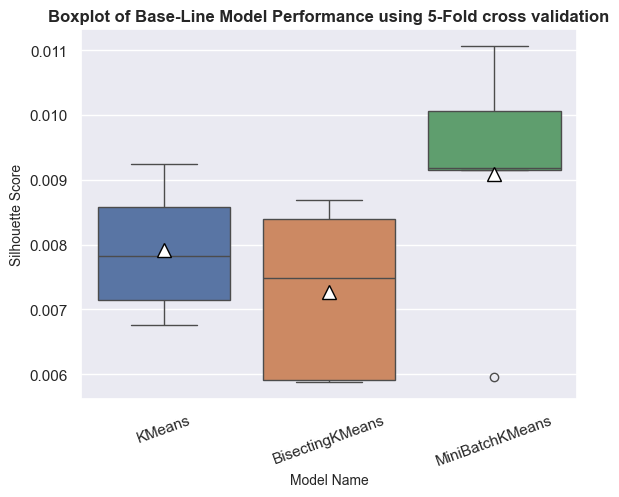

In [20]:
# Plot the results
sns.boxplot(x='model_name', y='silhouette_score', hue='model_name',
            data=cross_validation_df, showmeans=True,
            palette=sns.color_palette()[:baseline_models.__len__()],
            # Reference: https://matplotlib.org/stable/api/markers_api.html
            meanprops={"marker":"^","markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize":"10"}
            )
plt.title(f"Boxplot of Base-Line Model Performance using {K_FOLDS}-Fold cross validation",
          fontsize=12, fontweight="bold")
plt.xlabel("Model Name", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.xticks(rotation=20)
plt.show();

Summarize the results

In [21]:
# Summarize the results
baseline_results = \
    cross_validation_df.groupby('model_name')["silhouette_score"]\
        .agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Add metric names
baseline_results.columns.name = "silhouette_score"

baseline_results

silhouette_score      mean       std
model_name                          
MiniBatchKMeans   0.009081  0.001912
KMeans            0.007909  0.001020
BisectingKMeans   0.007269  0.001330

> Nh·∫≠n x√©t: `MiniBatchKMeans` l√† "baseline model" ch·∫°y t·ªët nh·∫•t tr√™n t·∫≠p d·ªØ li·ªáu `train_data`. ·ªû b∆∞·ªõc ti·∫øp theo, ta c·∫ßn th·ª±c hi·ªán "Hyper-parameter Tuning" ƒë·ªÉ gi√∫p c√°c model t·∫°o ra k·∫øt qu·∫£ t·ªët h∆°n n·ªØa.

## Hyper-parameter Tuning

### Getting the optimal number of clusters

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# wcss - within cluster sum of squared distances
wcss_df = pd.DataFrame(columns=['n_clusters', 'model_name', 'wcss'])
models = {
    'KMeans': KMeans,
    'BisectingKMeans': BisectingKMeans,
    'MiniBatchKMeans': MiniBatchKMeans,
}

data = vectorizer.transform(train_data)
K = list(range(3, 21, 1))
K = list(range(3, 21, 1))

with tqdm.tqdm(total=len(K)) as pbar:
    pbar.set_description("Elbow Method progress")
    for n_clusters in K:
        for model_name, model_prototype in models.items():
            model = model_prototype(n_clusters=n_clusters, random_state=SEED,
                                    init='k-means++', n_init=1)
            model.fit(data)
            wcss_df.loc[len(wcss_df)] = [n_clusters, model_name, model.inertia_]
        
        pbar.update(1)

# ~ 4min

Elbow Method progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [01:26<00:00,  4.82s/it]


Visualize the results

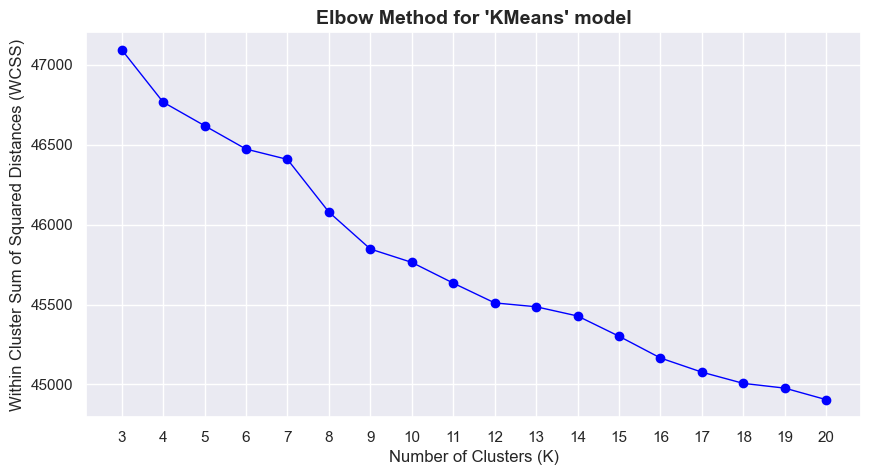

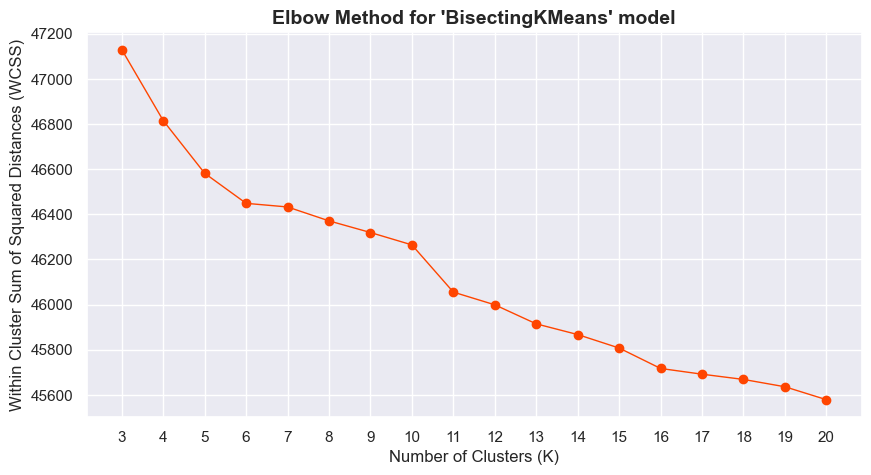

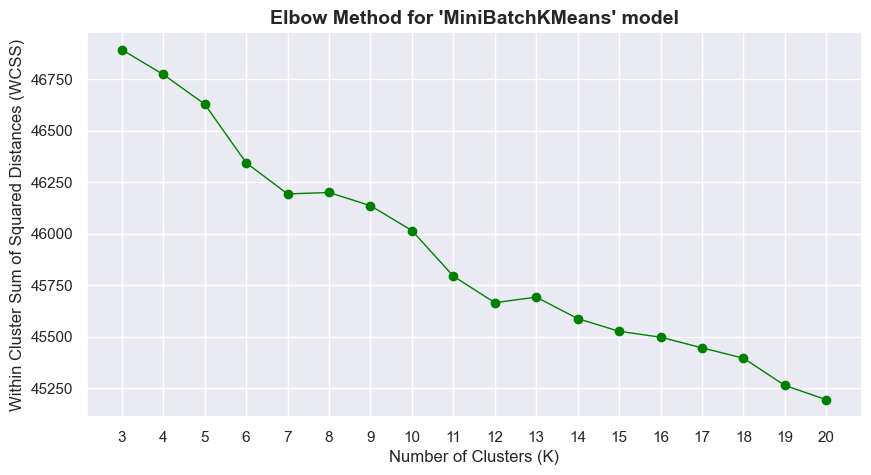

In [41]:
colors = ['blue', 'orangered', 'green']
for i, model_name in enumerate(models.keys()):
    ax = wcss_df.query(f"model_name == '{model_name}'").plot.line(
        x='n_clusters', y='wcss', figsize=(10, 5),
        marker='o', color=colors[i], linewidth=1,
        legend=False,
    )
    ax.set_xticks(K)
    ax.set_title(f"Elbow Method for \'{model_name}\' model",
                 fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax.set_xlabel("Number of Clusters (K)")
    ax.set_ylabel("Within Cluster Sum of Squared Distances (WCSS)")
    

> <u>**Nh·∫≠n x√©t**</u>: Quan s√°t c√°c bi·ªÉu ƒë·ªì tr√™n, ta th·∫•y r·∫±ng c√°c tham s·ªë `n_clusters` n√™n ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ tinh ch·ªânh m√¥ h√¨nh l√†: `[6, 7, 11, 12, 16]`.

Bi·ªÉu ƒë·ªì c·ªßa m√¥ h√¨nh `MiniBatchKMeans` c√≥ v·∫ª kh√≥ quan s√°t n√™n ta s·∫Ω ƒë·ªìng √Ω v·ªõi vi·ªác s·ª≠ d·ª•ng gi√° tr·ªã t·ªët nh·∫•t c·ªßa hai m√¥ h√¨nh c√≤n l·∫°i (`KMeans` v√† `BisectingKMeans`) l√† `K = 15`

### For the other hyper-parameters

In [80]:
def _hyperParameters_tuning(model: sklearn.cluster, 
                            hyperParams_grid: Dict[str, List]) -> Dict[str, Any]:
    best_score: float = 0.0
    best_hyperParams: Dict[str, Any] = None

    # Get all combinations
    all_combinations = list(itertools.product(*hyperParams_grid.values()))

    # Create a list of dictionaries for each combination
    hyperParams_combinations = [dict(zip(hyperParams_grid.keys(), combination)) 
                                for combination in all_combinations]

    # Convert text to numerical data using TF-IDF
    _data_to_train = vectorizer.transform(train_data)
    _data_to_valid = vectorizer.transform(valid_data)

    print(f"========== Fine-tuning '{model.__class__.__name__}' on total {len(hyperParams_combinations)} hyper-parameter combinations ==========")
    for i, hyperParams in enumerate(hyperParams_combinations,start=1):
        # Set hyperparameters
        model.set_params(**hyperParams)
        
        # Fit the model to the training data
        print(f"Fitting on combination {str(i).rjust(2)}...", end="")
        model.fit(_data_to_train)
        
        # Evaluate the model on the validation data
        print(f" -> Evaluating...", end="")
        pred = model.predict(_data_to_valid)
        score = metrics.silhouette_score(_data_to_valid, pred, metric='euclidean')

        if score > best_score:
            print(f" -> Get new best-score: {score:.6f}, updating best-hyper-parameters...")
            best_score = score
            best_hyperParams = hyperParams
        else:
            print(f" -> Best-score remains: {best_score:.6f}")
            
    return best_hyperParams


#### KMeans

In [ ]:
kmeans_best_hyperParams = _hyperParameters_tuning(KMeans(), {
    'verbose': [0],
    'random_state': [SEED],
    'max_iter': [300],
    'n_init': [1],
    'tol': [1e-6],
    
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan'],
    'n_clusters': [6, 7, 11, 12, 16],
}) # ~ 2min
kmeans_best_hyperParams

#### BisectingKMeans

In [ ]:
bisecting_kmeans_best_hyperParams = \
    _hyperParameters_tuning(BisectingKMeans(), {
        'verbose': [0],
        'random_state': [SEED],
        'max_iter': [300],
        'n_init': [1],
        'tol': [1e-6],
        
        'init': ['k-means++', 'random'],
        'algorithm': ['lloyd', 'elkan'],
        'bisecting_strategy': ['biggest_inertia', 'largest_cluster'],
        'n_clusters': [6, 7, 11, 12, 16],
    }) # ~ 6min
bisecting_kmeans_best_hyperParams

#### MiniBatchKMeans

In [ ]:
minibatch_kmeans_best_hyperParams = \
    _hyperParameters_tuning(MiniBatchKMeans(), {
        'verbose': [0],
        'random_state': [SEED],
        'max_iter': [300],
        'n_init': [10],
        'tol': [1e-6],
        'init_size': [None],
        'batch_size': [1024],
        
        'init': ['k-means++', 'random'],
        'n_clusters': [6, 7, 11, 12, 16],
        'max_no_improvement': [10, 20],
        'reassignment_ratio': [0.01, 0.001, 0.0001]
    }) # ~ 2min
minibatch_kmeans_best_hyperParams

## Training models and evaluation

Create models with the best hyper-parameters and save them for future use

In [71]:
# Get the best model
best_kmeans_model = KMeans(**kmeans_best_hyperParams)
best_bisecting_kmeans_model = BisectingKMeans(**bisecting_kmeans_best_hyperParams)
best_minibatch_kmeans_model = MiniBatchKMeans(**minibatch_kmeans_best_hyperParams)

best_models = {
    'best_kmeans_model': best_kmeans_model,
    'best_bisecting_kmeans_model': best_bisecting_kmeans_model,
    'best_minibatch_kmeans_model': best_minibatch_kmeans_model,
}

# Save the best model for later use
# Reference: https://stackoverflow.com/questions/54879434/how-to-use-pickle-to-save-sklearn-model
for model_name, model in best_models.items():
    with open(f"../data/models/{model_name}.pkl", "wb") as f:
        pickle.dump(model, f)

Load models if needed

In [9]:
best_models_lst = ['best_kmeans_model', 'best_bisecting_kmeans_model', 'best_minibatch_kmeans_model']
best_models = {}
# Load model if needed
for model_name in best_models_lst:
    with open(f"../data/models/{model_name}.pkl", "rb") as f:
        best_models[model_name] = pickle.load(f)
        print(f"[LOG] Loaded model '{model_name}'")

print(f">> Total number of models: {best_models.__len__()}")

[LOG] Loaded model 'best_kmeans_model'
[LOG] Loaded model 'best_bisecting_kmeans_model'
[LOG] Loaded model 'best_minibatch_kmeans_model'
>> Total number of models: 3


(Re-)Train models on (`training + validating` set) and evaluate them on `testing` set

In [ ]:
# Store the result to dateframe
# history_df = pd.DataFrame(columns=["model_name", "n_init", "score"])
history_df = pd.DataFrame(columns=["model_name", "max_iter", "score"])

# Combine train and validation data
final_train_data = pd.concat([train_data, valid_data], axis=0)

# Convert text to numerical data using TF-IDF
data_to_train = vectorizer.transform(final_train_data)
data_to_test = vectorizer.transform(test_data)

MAX_ITERS = range(1,11,2)
for max_iter in MAX_ITERS:
    # for n_init in range(1, 6):
    for model_name, model in best_models.items():
        # Update parameters of model
        model.random_state = SEED
        # model.n_init = n_init
        model.max_iter = max_iter
    
        # Fit each model on `data_to_train`
        model.fit(data_to_train)
        # Evalute model on `data_to_test`
        pred = model.predict(data_to_test)
        score = metrics.silhouette_score(data_to_test, pred)
        print(f"{model_name.rjust(15)} - {max_iter}: {score}")
    
        # Update history
        history_df.loc[len(history_df)] = [model_name, max_iter, score]
        

## Results analysis

Visualize the results

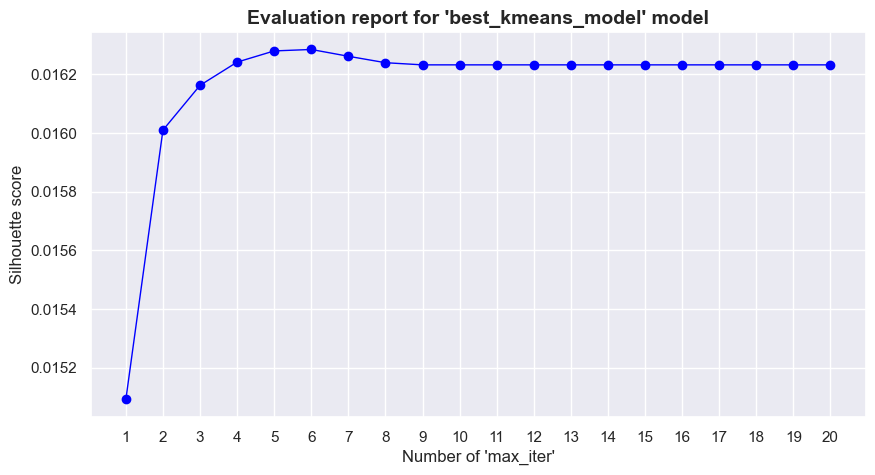

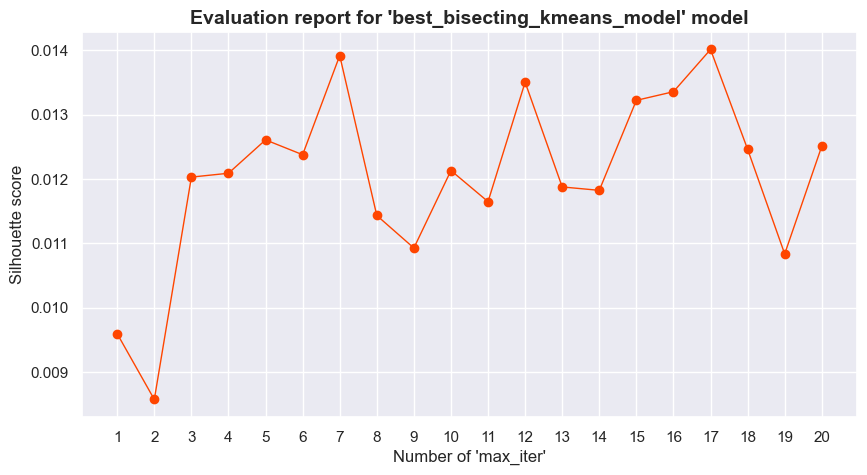

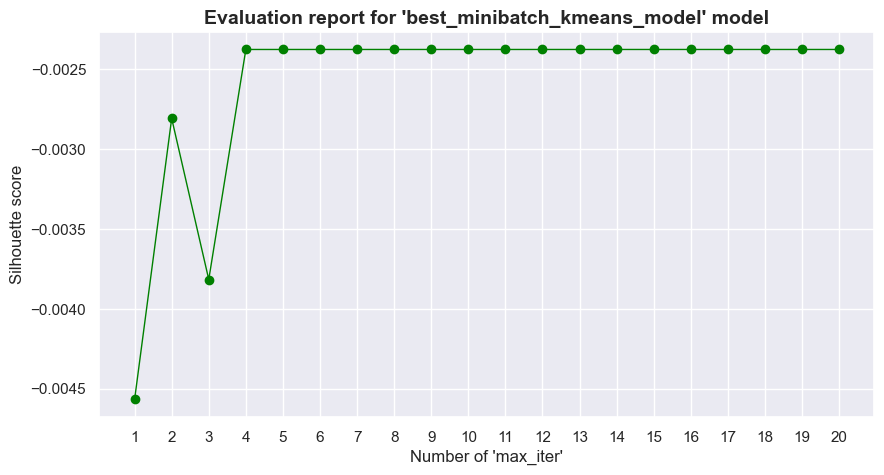

In [20]:
# Visualize the results
colors = ['blue', 'orangered', 'green']
for i, model_name in enumerate(best_models.keys()):
    ax = history_df.query(f"model_name == '{model_name}'").plot.line(
        x='max_iter', y='score', figsize=(10, 5),
        marker='o', color=colors[i], linewidth=1,
        legend=False,
    )
    ax.set_xticks(MAX_ITERS)
    ax.set_title(f"Evaluation report for \'{model_name}\' model",
                 fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax.set_xlabel("Number of \'max_iter\'")
    ax.set_ylabel("Silhouette score")
    

Summarize the results

In [19]:
# Summarize the results
eval_results = \
    history_df.groupby('model_name')["score"]\
        .agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Add metric names
eval_results.columns.name = "silhouette_score"

eval_results

silhouette_score                 mean       std
model_name                                     
best_kmeans_model            0.016168  0.000260
best_bisecting_kmeans_model  0.012045  0.001354
best_minibatch_kmeans_model -0.002579  0.000573

## Conclusion

Nh∆∞ v·∫≠y, `best_kmeans_model` l√† m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t tr√™n t·∫≠p d·ªØ li·ªáu c·ªßa ch√∫ng ta. Do ƒë√≥, ta s·∫Ω t·∫≠n d·ª•ng m√¥ h√¨nh n√†y ƒë·ªÉ gi·∫£i quy·∫øt b√†i to√°n ƒë√£ ƒë·ªÅ ra ban ƒë·∫ßu.

## Clustering all video titles

Define `my_best_model` and optimize it

In [8]:
# Define the best model
best_model_name = 'best_kmeans_model'
my_best_model = None
with open(f"../data/models/{best_model_name}.pkl", "rb") as f:
    my_best_model = pickle.load(f)
    # print(f"[LOG] Loaded model '{best_model_name}'")

# Display the best model
my_best_model

KMeans(algorithm='elkan', n_clusters=16, n_init=1, random_state=2023, tol=1e-06)

In [9]:
# Optimize the model
my_best_model.n_init = 10

In [10]:
# TEST
my_best_model.get_params()

{'algorithm': 'elkan',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 16,
 'n_init': 10,
 'random_state': 2023,
 'tol': 1e-06,
 'verbose': 0}

Train `my_best_model` on all video data in dataset

In [11]:
# Combine train, validation and test data
all_video_data = pd.concat((train_data, valid_data, test_data), axis=0)

# Convert text to numerical data using TF-IDF
data = vectorizer.transform(all_video_data)

# Train the model on all data
my_best_model.fit(data)

# Get the labels (cluster_id) of all data
labels = my_best_model.predict(data)
# ~ 4min

Use prediction result to assign `cluster_id` to each video in dataset

In [14]:
video_cluster_df = pd.DataFrame({
    'index': all_video_data.index,
    'cluster_id': labels
})

In [15]:
merged_df = pd.merge(left=video_cluster_df, right=clean_df, 
                     how='inner', left_on='index', right_index=True)

Drop unnecessary columns

In [16]:
# Drop unnecessary columns
unnecessary_cols = ['index', 'clean_title', 'publishedAt.hour', 'publishedAt.day', 
                    'publishedAt.year', 'publishedAt.month']
merged_df.drop(columns=unnecessary_cols, inplace=True)

In [17]:
# TEST
merged_df.sample(3)

cluster_id     video_id        channelTitle  \
50877           2  Gh9HkS_-WRg   Satyajit Pattnaik   
21746           0  im6qomYIdms         Siddhardhan   
5597           11  CWgcH7wXdjw  The Data Incubator   

                                                   title  \
50877  Data Visualization | 10 Useful Ways to Visuali...   
21746  ChatGPT - Hyperparameter Tuning of Support Vec...   
5597   Data Science Ethics: What it Means and Why it ...   

                                             description  \
50877  Data Visualization | 10 Useful Ways to Visuali...   
21746  Code file: https://drive.google.com/file/d/1FR...   
5597   Watch this insightful webinar on data science ...   

                                                    tags  \
50877  satyajit pattnaik|data science|data analytics|...   
21746              machine Learning|ChatGPT|data science   
5597                                             (notag)   

                     publishedAt  viewCount  likeCount  commentCount  \
50877  2021-12-10 13:30:03+00:00        395         22             7   
21746  2023-01-07 11:39:02+00:00       4160        175             2   
5597   2022-12-07 18:10:11+00:00        231          1             0   

       duration definition  caption  publishedAt.dayOfWeek  \
50877      1183         hd    False                      4   
21746        58         hd    False                      5   
5597       3559         hd    False                      2   

       publishedAt.weekOfYear  
50877                      49  
21746                       1  
5597                       49

In [18]:
# Save final data for later use
merged_df.to_csv('../data/processed/video_data_clustered.csv', index=False)

# Save the model for later use
with open("../data/models/my_best_model.pkl", "wb") as f:
    pickle.dump(my_best_model, f)

## Prediction

Return top `n` video titles in the same cluster

In [19]:
# Return top `n` video titles in the same cluster
def _recommend_top_n_videos(cluster_id, top_n: int = 10) -> List[str]:
    # Define a dataframe to store the recommended videos
    recommended_videos = pd.DataFrame(columns=['channelTitle', 'title'])
    # !USING THE BELOW CODE FOR TESTING
    # recommended_videos = pd.DataFrame(columns=['channelTitle', 'title', 'viewCount'])
    
    # Define a set to store the channels that have been recommended
    set_of_channels = set()
    
    # Get all videos in the same cluster
    #   Then sort them by their views
    video_in_cluster = merged_df.query(f"cluster_id == {cluster_id}")\
                            .sort_values(by='viewCount', ascending=False)
    
    # Iterate through each video in the cluster
    for i, video in video_in_cluster.iterrows():
        channelTitle = video['channelTitle']
        videoTitle = video['title']
        
        # If the channel has already been recommended, skip it
        if channelTitle in set_of_channels:
            continue
        
        # Otherwise, add it to the list of recommended channels
        if len(recommended_videos.columns) == 2:
            recommended_videos.loc[len(recommended_videos)] = [channelTitle, videoTitle]
        else: # !USING THE BELOW CODE FOR TESTING
            recommended_videos.loc[len(recommended_videos)] = [channelTitle, videoTitle, video['viewCount']]
        
        # Add the channel to the set
        set_of_channels.add(channelTitle)
        
        # If we have enough channels, stop
        if len(recommended_videos) >= top_n:
            break        
    
    return recommended_videos

Assign `cluster_id` for new text data

In [20]:
# Assuming 'new_data' is a list of new video titles
new_data = ["Tech news and updates",
            "How to learn programming in 2023",
            "Top 10 Python tips and tricks",
            "Machine learning explained in 5 minutes",
            "How to become a Data Analyst",
            ]

new_data = pd.Series(new_data)
text_values = new_data.apply(preprocess_text)

# Transform the preprocessed new data into TF-IDF features using the same vectorizer
new_tfidf_matrix = vectorizer.transform(text_values)

# Use the trained k-means model to predict cluster labels for the new data
pred_labels = my_best_model.predict(new_tfidf_matrix)

Show some results

In [21]:
# Display the results
for i, title in enumerate(new_data):
    recommended_videos = _recommend_top_n_videos(pred_labels[i], top_n=5)
    print(f"Recommended videos for '{title}':")
    print(recommended_videos)
    print("--------------------------------------\n")

Recommended videos for 'Tech news and updates':
        channelTitle                                              title
0    Google DeepMind  AlphaGo - The Movie | Full award-winning docum...
1          Joma Tech  a day in the life of an engineer working from ...
2        3Blue1Brown  But what is a Fourier series?  From heat flow ...
3        Lex Fridman  Jordan Peterson: Life, Death, Power, Fame, and...
4  Two Minute Papers  OpenAI Plays Hide and Seek‚Ä¶and Breaks The Game! ü§ñ
--------------------------------------

Recommended videos for 'How to learn programming in 2023':
        channelTitle                                              title
0         Tina Huang  How I would learn to code (if I could start over)
1            CS Dojo  Top 5 Programming Languages to Learn to Get a ...
2           DataCamp                                Better Way to Learn
3  Two Minute Papers        How Well Can DeepMind's AI Learn Physics? ‚öõ
4         Krish Naik                 How To Learn Data

# ----- break -----

In [ ]:
def my_clustering(s, n_clusters, print_clusters=False): 
    text_values = s

    # Convert text to numerical data using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_values)

    # Choose the number of clusters (you may need to adjust this based on your data)
    num_clusters = n_clusters

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)

    # Print the clusters
    if print_clusters:
        # Get cluster labels
        cluster_labels = kmeans.labels_
        for i in range(num_clusters):
            print(f"Cluster {i + 1}:")
            cluster_texts = np.array(text_values)[cluster_labels == i]
            for text in cluster_texts:
                print(f"  - {text}")
            print("\n")
    
    return kmeans, vectorizer

## Clustering tags

# -------------------- BREAK --------------------

## Feature engineering

In [ ]:
target = "viewCount"
X = clean_df.copy()
X.drop(target, axis=1, inplace=True)
y = clean_df[target].copy()

cat_cols = [col for col in X.columns if X[col].dtype == "object"]
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    # X_val[col] = le.transform(X_val[col])
    # X_test[col] = le.transform(X_test[col])

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

## Training model and evaluation

In [ ]:
# YOUR CODE HERE (OPTION) 

## Evaluation

In [ ]:
# YOUR CODE HERE (OPTION) 

## Prediction

In [ ]:
# YOUR CODE HERE (OPTION) 

## Results analysis

In [ ]:
# YOUR CODE HERE (OPTION) 

## Conclusion

**Your conclusion**